In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('bike_sharing_daily.csv')

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [6]:
df_bs= df[['casual','atemp','hum','windspeed','registered','cnt']].dropna()


In [7]:
df_bs

,casual,atemp,hum,windspeed,registered,cnt
0,331.0,0.363625,0.805833,0.160446,654.0,985
1,131.0,0.353739,0.696087,0.248539,670.0,801
3,108.0,0.212122,0.590435,0.160296,1454.0,1562
4,82.0,0.229270,0.436957,0.186900,1518.0,1600
5,88.0,0.233209,0.518261,0.089565,1518.0,1606
...,...,...,...,...,...,...
724,440.0,0.294465,0.734783,0.168726,573.0,1013
726,247.0,0.226642,0.652917,0.350133,1867.0,2114
728,159.0,0.242400,0.752917,0.124383,1182.0,1341
729,364.0,0.231700,0.483333,0.350754,1432.0,1796


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-0c8a73b2ca3f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bs['casual'], ax= axs[0])
<ipython-input-10-0c8a73b2ca3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bs['atemp'], ax= axs[1])
<ipython-input-10-0c8a73b2ca3f>:4: UserWarning: 

`distplot` is a deprecated 

<Axes: xlabel='registered', ylabel='Density'>

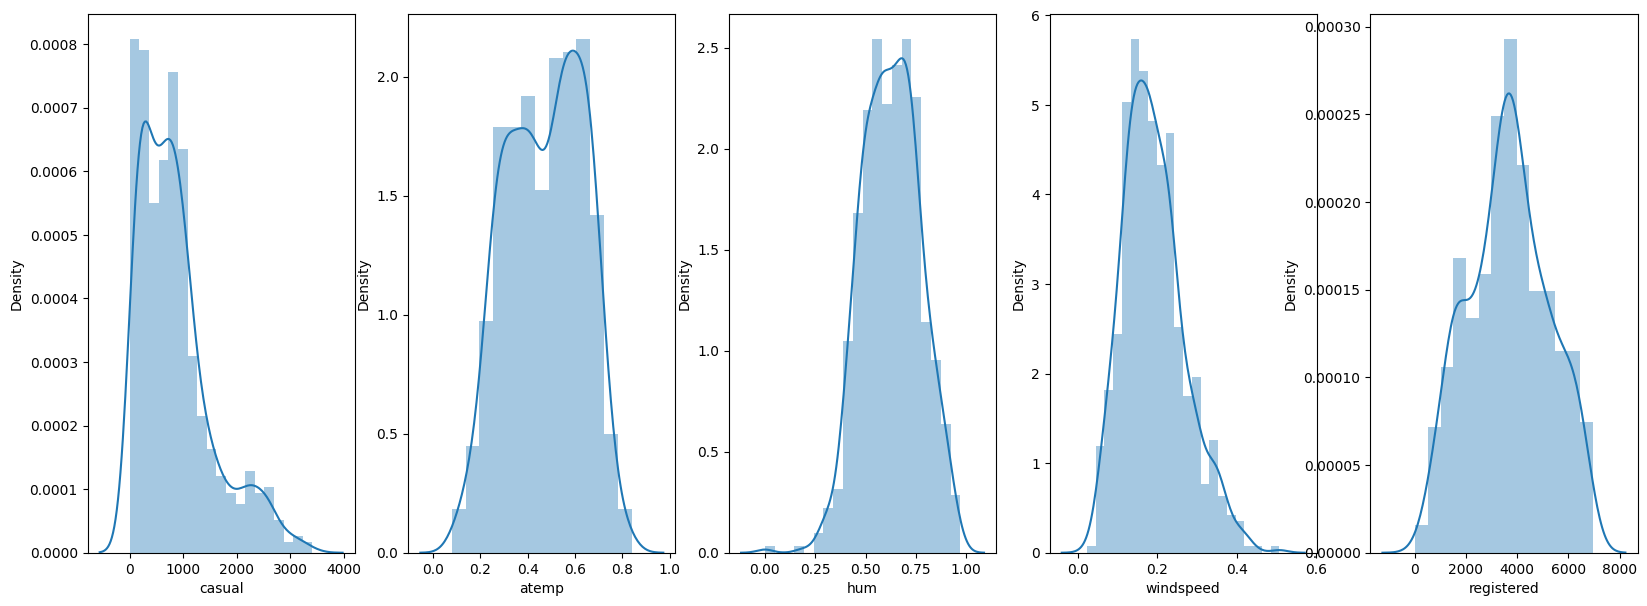

In [10]:
fig, axs = plt.subplots(ncols=5, figsize=(20,7))
sns.distplot(df_bs['casual'], ax= axs[0])
sns.distplot(df_bs['atemp'], ax= axs[1])
sns.distplot(df_bs['hum'], ax= axs[2])
sns.distplot(df_bs['windspeed'], ax= axs[3])
sns.distplot(df_bs['registered'], ax= axs[4])


In [ ]:
#정규 분포와 비슷한 컬럼 -> registered
#정규 분포와 비슷하지 않은 컬럼 -> atemp


In [11]:
df_bs1 = df_bs[['casual','registered','cnt']]
df_bs2 = df_bs[['casual','atemp','cnt']]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
df_X = np.array(df_bs1[['casual','registered']]) #X 피처를 따로 빼고 numpy arrapy로 변환

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs1['cnt'], test_size=0.3, random_state=111)

In [14]:
model =LinearRegression() # 선형회귀 모델 불러오기

In [15]:
model.fit(X_train, y_train)#선형회귀 모델 학습
y_pred = model.predict(X_test)# X_test로 예측값 추출

In [16]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [17]:
rmse
#비교적 작은 오차가 도출된 것을 알 수 있다.

3.305494201843464

In [18]:
X = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs['cnt'], df_bs['casual']).fit()
summary = model_ols.summary()

In [19]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              2270.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                   6.70e-214
Time:                        07:26:18   Log-Likelihood:                         -5950.0
No. Observations:                 649   AIC:                                  1.190e+04
Df Residuals:                     648   BIC:                                  1.191e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
casual         3.9708      0.083     47.642      0.000       3.807       4.134
==============================================================================
Omnibus:                       80.862   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.679
Skew:                          -0.960   Prob(JB):                     2.52e-24
Kurtosis:                       3.577   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df_X = np.array(df_bs2[['casual','atemp']]) #X 피처를 따로 빼고 numpy arrapy로 변환

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs1['cnt'], test_size=0.3, random_state=111)

In [24]:
model =LinearRegression() # 선형회귀 모델 불러오기

In [25]:
model.fit(X_train, y_train)#선형회귀 모델 학습
y_pred = model.predict(X_test)# X_test로 예측값 추출

In [26]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [27]:
rmse

1268.763797086146

In [ ]:
#확실히 기존에 정규분포성을 띠고 있는지의 여부에 의해 rms값이 천차만별로 달라지는 것을 확인할 수 있다.